## Plotting Simluation Runs
In this notebook, we will plot simluation runs after running either `start_infraction_experiments.ipynb` and `start_hijacking_experiments.ipynb`. 

### Step 1: Import Dependencies
`carla.planner.map` will allow us to plot the trajectories of each simulation run on an approximate CARLA map. We will use `pandas` to read csv files generated by the CARLA simulator.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from utils import plot_trajectories
from matplotlib.patches import Circle
from carla.planner.map import CarlaMap

### Step 2: Set up Plotting Paremeters
We need to choose the path and town where the results of our simulations are stored. In the case of running `run-lanefollow-experiments.ipynb`, these will be in directory `_benchmarks_results/Town01_nemesisA`.

In [2]:
path       = '_benchmarks_results/'
town       = 'Town01_nemesisA'
experiment = town + '/'

### Step 3: Get all Simulation Runs
Now, let's iterate through this directory and get the csv files which describe each simulation run in a frame-by-frame manner.

In [3]:
folders = os.listdir(path + experiment)

for folder in folders:
    if 'AdversarySuite' not in folder.split('_'):
        folders.remove(folder)
    if 'baseline' in folder.split('_'):
        baseline_path = folder
        folders.remove(folder)

### Step 4: Plot Runs
Finally, let's plot each run on the CARLA map.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

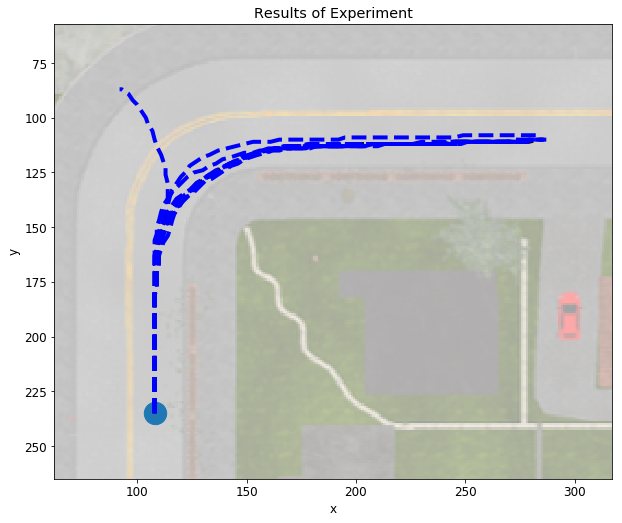

In [5]:
# get the baseline run
df_baseline = pd.read_csv(path + experiment + baseline_path + '/measurements.csv')

# create trajectories dictionary
trajectories_dict = {}

# get x,y position of baseline run
baseX, baseY  = df_baseline['pos_x'], df_baseline['pos_y']
MAX_LEN       = int(len(baseX)*.8)
baseX, baseY  = baseX[:MAX_LEN], baseY[:MAX_LEN] 

# update trajectories dictionary
trajectories_dict['baseline'] = {'x' : baseX, 'y' : baseY}
trajectories_dict['start']    = {'x' : baseX[0:1], 'y' : baseY[0:1]}
    
# iterate through each simulation run
for item in range(len(folders)):
    # get the csv path for current simulation run
    csv_path = path + experiment + 'adversary_{}_AdversarySuite_{}'.format(item, town) + '/measurements.csv'
    try:
        df_adversary = pd.read_csv(csv_path)
    except:
        continue
        
    if df_adversary.shape[0] == 0:
        print("Skipping {}".format(csv_path))
        continue
    
    # get x,y position of vehicle during an attack.
    attackX, attackY = df_adversary['pos_x'][:MAX_LEN], df_adversary['pos_y'][:MAX_LEN]
    
    # update trajectories_dict
    trajectories_dict['attack ' + str(item)] = {'x' : attackX, 'y' : attackY}
    
# plot trajectories on CARLA
plot_trajectories(trajectories_dict, 'Results of Experiment', add_legend=False)